In [1]:
# Web Scraping
from requests import get
from bs4 import BeautifulSoup

# Data
import pandas as pd
from pprint import pprint

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CURRENT_YEAR = 2021
df = pd.read_csv('NFL Mock Drafts - Past QB Order.csv', encoding = 'utf-8')

In [3]:
# Change Columns
df.columns = df.loc[0]

# Drop Empty Cols
df = df.drop(0).drop(columns=['Needed A QB', 'Qb Category'])

# Fill in Empty Years
for row in df.index[1:]:
    if pd.isnull(df.loc[row, 'Year']):
        df.loc[row, 'Year'] = df.loc[row-1, 'Year']
        
# Delete NA Rows
for row in df.index:
    if pd.isnull(df.loc[row, 'Pick Order']):
        df.drop(row, inplace=True)
        
df

,Year,Pick Order,Grade Order,Team,Pick Num,Player,Grade,Pro Comparison
2,2014,1,1,Jaguars,3,Blake Bortles,6.8,NaN
3,2014,2,2,Browns,22,Johnny Manziel,6.4,NaN
4,2014,3,1,Vikings,32,Teddy Bridgewater,6.8,NaN
6,2015,1,1,Bucs,1,Jameis Winston,7,Eli Manning
7,2015,2,2,Titans,2,Marcus Mariota,6.8,Colin Kaepernick
9,2016,1,1,Rams,1,Jared Goff,7,Matt Ryan
10,2016,2,3,Eagles,2,Carson Wentz,6.7,Blake Bortles
11,2016,3,2,Broncos,26,Paxton Lynch,6.8,Marcus Mariota
13,2017,1,1,Bears,2,Mitchell Trubisky,7,Matthew Stafford
14,2017,2,2,Chiefs,10,Patrick Mahomes,6.8,Jay Cutler


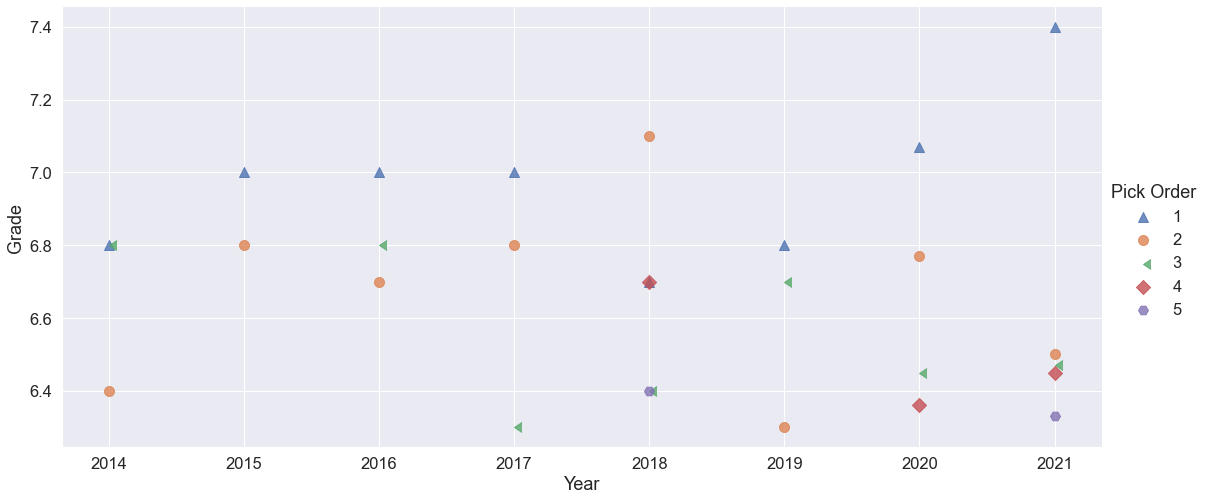

In [5]:
new = df.copy()
new['Grade'] = new['Grade'].astype(float)
new['Pick Order'] = new['Pick Order'].astype(int)

sns.set(rc={"figure.figsize": (12, 10)}, font_scale=1.5)
sns.lmplot(x='Year', y='Grade', data=new, hue='Pick Order', fit_reg=False, height = 7, aspect = 2.2, scatter_kws={"s": 100},
          markers = ['^', 'o', 4, 'D', 'H'])